In [1]:
## Bow, TFIDF, Machine Learning Algorithms

In [101]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt', sep = '\t', names=['label','message'])

In [102]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [103]:
# Data Cleaning and Preprocessing
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [104]:
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['message'][i])
    review = review.lower().split()
    review = [lemmatizer.lemmatize(word, pos='v') for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [105]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner value network customer select receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitle update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cry enough today',
 'six chance win cash pound txt csh send cost p day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',


## Create Bag Of Words

In [106]:
## Output feature
y = pd.get_dummies(messages['label'], drop_first=True)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [107]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.3,random_state=42)

In [108]:
#create Bag Of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary = True, ngram_range=(1,3))

In [109]:
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [111]:
cv.vocabulary_

{'quite': 1674,
 'late': 1091,
 'lar': 1084,
 'ard': 75,
 'anyway': 68,
 'wun': 2452,
 'tuesday': 2192,
 'night': 1425,
 'real': 1697,
 'go': 792,
 'run': 1775,
 'street': 2011,
 'say': 1789,
 'never': 1409,
 'answer': 59,
 'texts': 2085,
 'confirm': 395,
 'still': 1994,
 'work': 2431,
 'small': 1922,
 'house': 964,
 'think': 2099,
 'could': 430,
 'stop': 1996,
 'like': 1136,
 'hour': 962,
 'roommate': 1768,
 'look': 1170,
 'stock': 1995,
 'trip': 2173,
 'think could': 2100,
 'like hour': 1139,
 'lol': 1164,
 'great': 840,
 'im': 995,
 'get': 756,
 'hungry': 978,
 'would': 2440,
 'good': 818,
 'phone': 1558,
 'tomo': 2145,
 'shall': 1869,
 'something': 1948,
 'yesterday': 2487,
 'true': 2175,
 'ya': 2471,
 'nice': 1422,
 'ready': 1696,
 'hi': 922,
 'way': 2348,
 'day': 481,
 'normal': 1447,
 'ur': 2241,
 'hope': 952,
 'know': 1064,
 'rest': 1741,
 'find': 663,
 'wot': 2439,
 'lose': 1179,
 'today': 2139,
 'accept': 6,
 'brother': 207,
 'sister': 1905,
 'lover': 1193,
 'dear': 492,
 'be

In [112]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3900, 2500) (3900, 1)
(1672, 2500) (1672, 1)


In [113]:
# Choosing Nauve Baye's (multinomial) model as  it performs well with the text data
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()

In [114]:
spam_detect_model.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [115]:
y_pred = spam_detect_model.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.91      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



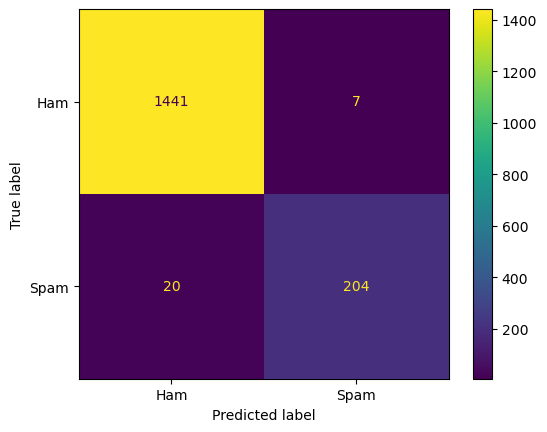

In [117]:
import matplotlib.pyplot as plt
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,labels=spam_detect_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham','Spam'])
disp.plot(values_format='')
plt.show()

## TF-IDF Model

In [195]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,y,test_size=0.2,random_state=42)

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

In [197]:
X_train = tf.fit_transform(X_train).toarray()
X_test = tf.transform(X_test).toarray()

In [198]:
tf.vocabulary_

{'reply': 708,
 'win': 958,
 'weekly': 945,
 'world': 973,
 'hold': 393,
 'send': 751,
 'stop': 812,
 'end': 248,
 'service': 754,
 'send stop': 753,
 'hello': 381,
 'sort': 795,
 'town': 876,
 'already': 18,
 'dont': 220,
 'home': 396,
 'eat': 242,
 'let': 469,
 'know': 442,
 'let know': 470,
 'come': 152,
 'go': 330,
 'tell': 837,
 'hey': 383,
 'till': 860,
 'meet': 523,
 'even': 257,
 'single': 771,
 'time': 861,
 'saw': 736,
 'orange': 614,
 'bring': 81,
 'ringtones': 721,
 'free': 297,
 'hit': 388,
 'week': 942,
 'pics': 643,
 'receive': 698,
 'reply stop': 710,
 'sit': 775,
 'mu': 558,
 'wait': 924,
 'everyone': 262,
 'get': 320,
 'suite': 819,
 'take': 831,
 'shower': 765,
 'finish': 285,
 'liao': 471,
 'urgent': 909,
 'mobile': 538,
 'award': 47,
 'bonus': 71,
 'prize': 674,
 'nd': 569,
 'attempt': 41,
 'contact': 165,
 'call': 89,
 'box': 77,
 'urgent mobile': 910,
 'bonus caller': 72,
 'nd attempt': 570,
 'attempt contact': 42,
 'probably': 678,
 'still': 811,
 'stuff': 816,


In [199]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_tf = MultinomialNB()

In [200]:
spam_detect_tf.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [201]:
y_pred = spam_detect_tf.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



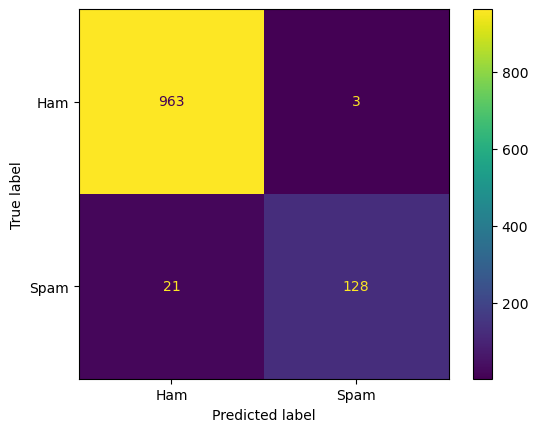

In [202]:
import matplotlib.pyplot as plt
print(classification_report(y_test,y_pred))
print('='*35)
cm = confusion_matrix(y_test,y_pred,labels=spam_detect_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham','Spam'])
disp.plot(values_format='')
plt.show()